# Example Datasets

Here, we implemented neural network model for a classifiaction task and a regression task. The datasets we used are [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (classification) and [boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) (regression) from sklearn.

We use NeuralNet class from nnet.py which is basically a gathered version of what we have done in the [learning_internal_representation notebook](./learning_internal_representations.ipynb)

For further information about datasets, see [Breast Cancer Dataset Info](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) and [Boston Info](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

In [1]:
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.preprocessing import StandardScaler

from nnet import NeuralNet

In [2]:
# Setting Data Frame Options                      
pd.set_option('display.max_rows', 40)                      
pd.set_option('display.max_columns', 50)                      
pd.set_option('display.width', 100)                      
pd.set_option('display.max_colwidth', 100)                      

# Setting Plot Configuration                      
sns.set(rc={'figure.figsize':(17,11)}, style = 'white')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Breast Cancer Classification

Here, the goal is to make a diagnose prediction with the input data of 30 features as malignant or bening. The dataset contains 569 observations. You can see some summary stats of the input data.

We will use a simple feed-forward neural network that we constructed, and employ the following architecture.

<img src="assets/breast_cancer_architecture.png" width="550" title="Breast Cancer Model Architecture">
<center>Figure 2: <em>Breast Cancer Model Architecture</em></center>

Here *Dense* represents a fully connected layer. We use error function as activation for both of the hidden layers and sigmoid for the output layer.

In [3]:
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']
y = y.reshape(len(y), 1)

pd.DataFrame(X).describe()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
layers_ = [40, 20, 1]
activations_ = ['erf', 'erf', 'sigmoid']
loss_ = 'mse'
learning_rate_ = 0.01
epochs_ = 2000

model = NeuralNet(layers=layers_, activations=activations_)

model.fit(X, y, epochs=epochs_, learning_rate=learning_rate_, loss=loss_)

y_pred = model.predict(X, return_classes=True)

print("="*60)
print("Confusion Matrix")
print(classification_report(y, y_pred))

Epoch 0 	 Cost: 0.755873263064045
Epoch 263 	 Cost: 0.10390655499794257
Epoch 526 	 Cost: 0.08843125549068516
Epoch 789 	 Cost: 0.07774427793986965
Epoch 1052 	 Cost: 0.0711520255274482
Epoch 1315 	 Cost: 0.06633425061289724
Epoch 1578 	 Cost: 0.07372450307447141
Epoch 1841 	 Cost: 0.07057897144197268
Confusion Matrix
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       212
           1       0.87      0.99      0.93       357

    accuracy                           0.90       569
   macro avg       0.93      0.87      0.89       569
weighted avg       0.91      0.90      0.90       569



**Learning Curve**

Let's plot the learning curve to see how model is done against the total cost.

<IPython.core.display.Javascript object>

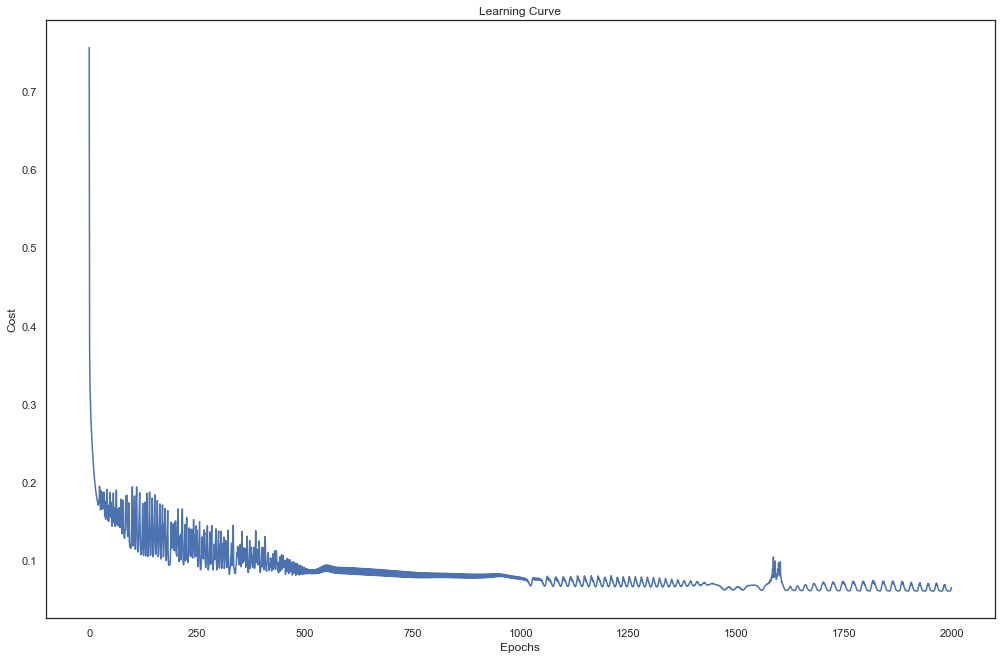

In [5]:
costs = model.history['costs']
learning_curve_1 = sns.lineplot(x=np.arange(len(costs)), y=costs)
learning_curve_1.set(title='Learning Curve', xlabel='Epochs', ylabel='Cost')
None

## Boston House Price Prediction

Here, the goal is to make a diagnose prediction with the input data of 30 features as malignant or bening. The data contains 506 observations. You can see some summary stats of the input data.

<img src="assets/boston_architecture.png" width="550" title="Boston House Pricing Model Architecture">
<center>Figure 2: <em>Boston House Pricing Model Architecture</em></center>

For better performance, we scale the input data with a [standardization](https://en.wikipedia.org/wiki/Standard_score), and apply a log scale on the target variable.

In [6]:
dataset = load_boston()
X, y = dataset['data'], dataset['target']
y = y.reshape(len(y), 1)

pd.DataFrame(X).describe()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#### NeuralNet Implementation

Below, we provided an implementation with our NeuralNet class built from scracth.

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.log(y)

layers_ = [30, 15, 1]
activations_ = ['arctan', 'relu', 'linear']
loss_ = 'mse'
learning_rate_ = 0.1
epochs_ = 500

model = NeuralNet(layers=layers_, activations=activations_)

model.fit(X, y, epochs=epochs_, learning_rate=learning_rate_, loss=loss_)

y_pred = model.predict(X, return_classes=False)

mse = mean_squared_error(y, y_pred)
print("="*60)
print(f'MSE: {mse: .4f} \t RMSE: {mse**.5: .4f}')

<IPython.core.display.Javascript object>

Epoch 0 	 Cost: 9.356833216991
Epoch 80 	 Cost: 0.045059594358825686
Epoch 160 	 Cost: 0.037906235097859564
Epoch 240 	 Cost: 0.03688022958724839
Epoch 320 	 Cost: 0.03637438223583638
Epoch 400 	 Cost: 0.03609809218255793
Epoch 480 	 Cost: 0.035951889636411494
MSE:  0.0359 	 RMSE:  0.1895


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

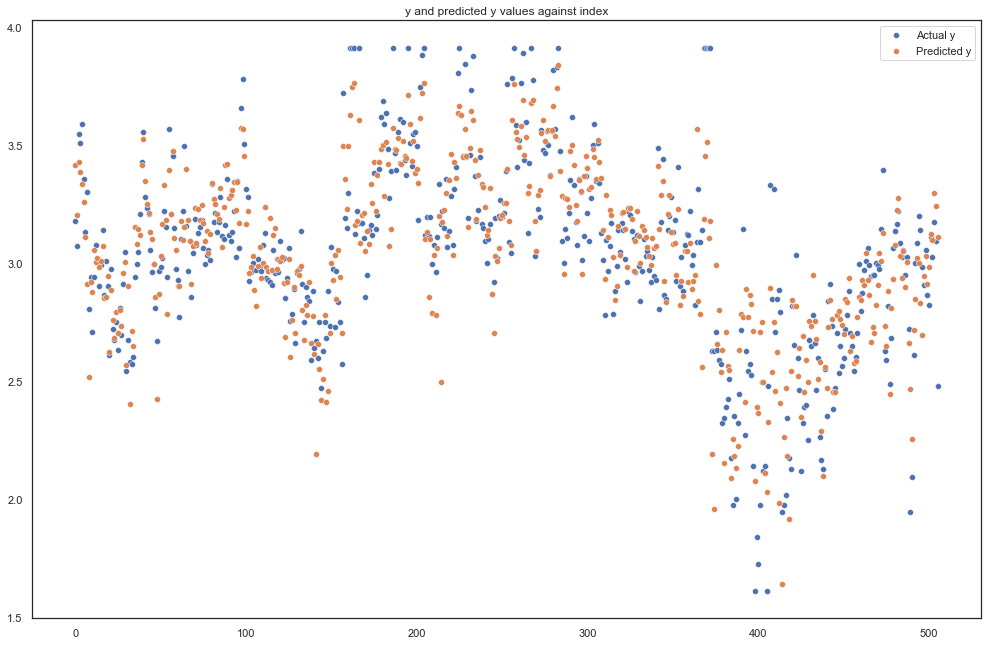

In [8]:
sns.scatterplot(x=np.arange(X.shape[0]), y=y.ravel())
fig = sns.scatterplot(x=np.arange(X.shape[0]), y=y_pred.ravel())
fig.set(title='y and predicted y values against index')
plt.legend(['Actual y', 'Predicted y'])
None

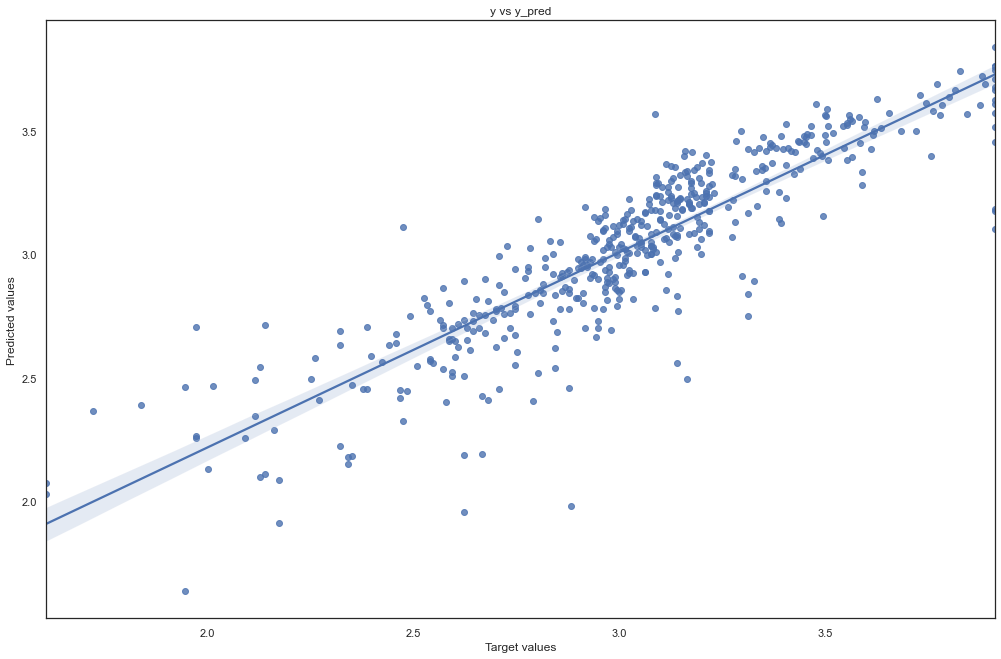

In [9]:
fig = sns.regplot(x=y, y=y_pred)
fig.set(xlabel='Target values', ylabel='Predicted values', title='y vs y_pred')
None

**Learning Curve**

Let's plot the learning curve to see how model is done against the total cost.

<IPython.core.display.Javascript object>

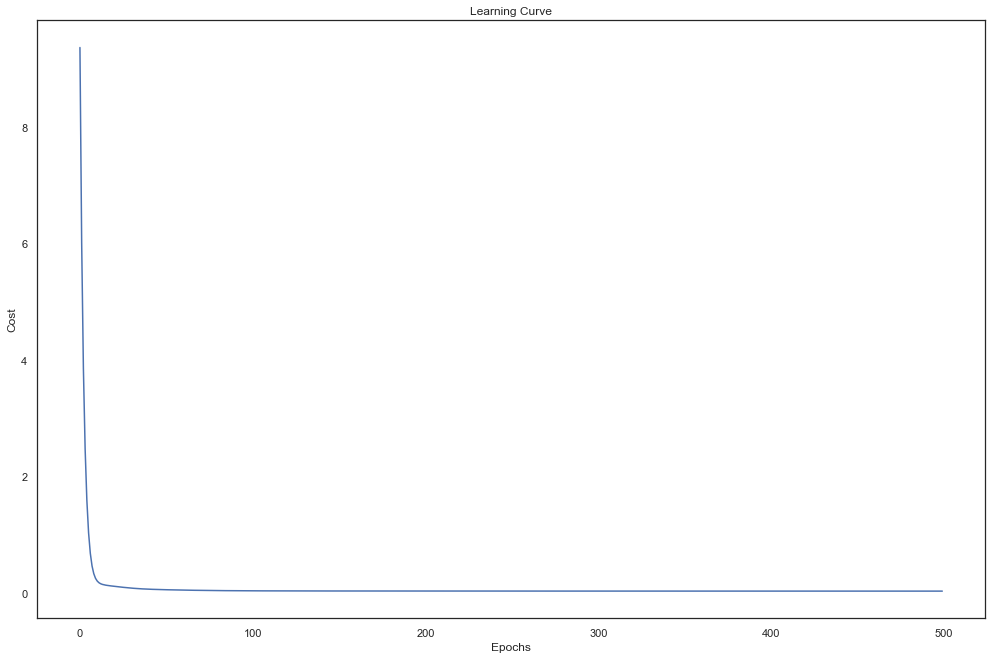

In [10]:
costs = model.history['costs']
learning_curve_2 = sns.lineplot(x=np.arange(len(costs)), y=costs)
learning_curve_2.set(title='Learning Curve', xlabel='Epochs', ylabel='Cost')
None

#### Tensorflow Implementation

You can see a simple tensorflow implementation for the Boston house pricing dataset.

In [11]:
import tensorflow as tf

In [12]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=0.1)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(13, activation=None, kernel_initializer=initializer))
    model.add(tf.keras.layers.Dense(30, activation=tf.math.atan, kernel_initializer=initializer))
    model.add(tf.keras.layers.Dense(15, activation='relu', kernel_initializer=initializer))
    model.add(tf.keras.layers.Dense(1, activation=None, kernel_initializer=initializer))

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate_, momentum=0, nesterov=False),
                  loss=tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size'),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [13]:
model = create_model()
history = model.fit(X, y, epochs=epochs_, batch_size=X.shape[0])

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 9.4598 - root_mean_squared_error: 3.0757
Epoch 2/500
1/1 [==============================] - 0s 993us/step - loss: 6.0090 - root_mean_squared_error: 2.4513
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 3.8371 - root_mean_squared_error: 1.9588
Epoch 4/500
1/1 [==============================] - 0s 0s/step - loss: 2.4237 - root_mean_squared_error: 1.5568
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 1.4991 - root_mean_squared_error: 1.2244
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9009 - root_mean_squared_error: 0.9492
Epoch 7/500
1/1 [==============================] - 0s 0s/step - loss: 0.5294 - root_mean_squared_error: 0.7276
Epoch 8/500
1/1 [==============================] - 0s 993us/step - loss: 0.3156 - root_mean_squared_error: 0.5618
Epoch 9/500
1/1 [==============================] - 0s 994us/step - loss: 0.2040 - root_mean_squared_er

1/1 [==============================] - 0s 0s/step - loss: 0.0390 - root_mean_squared_error: 0.1974
Epoch 74/500
1/1 [==============================] - 0s 0s/step - loss: 0.0388 - root_mean_squared_error: 0.1971
Epoch 75/500
1/1 [==============================] - 0s 0s/step - loss: 0.0387 - root_mean_squared_error: 0.1968
Epoch 76/500
1/1 [==============================] - 0s 0s/step - loss: 0.0386 - root_mean_squared_error: 0.1965
Epoch 77/500
1/1 [==============================] - 0s 0s/step - loss: 0.0385 - root_mean_squared_error: 0.1963
Epoch 78/500
1/1 [==============================] - 0s 0s/step - loss: 0.0384 - root_mean_squared_error: 0.1960
Epoch 79/500
1/1 [==============================] - 0s 0s/step - loss: 0.0383 - root_mean_squared_error: 0.1958
Epoch 80/500
1/1 [==============================] - 0s 0s/step - loss: 0.0382 - root_mean_squared_error: 0.1955
Epoch 81/500
1/1 [==============================] - 0s 0s/step - loss: 0.0381 - root_mean_squared_error: 0.1953
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0352 - root_mean_squared_error: 0.1875
Epoch 146/500
1/1 [==============================] - 0s 0s/step - loss: 0.0351 - root_mean_squared_error: 0.1874
Epoch 147/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0351 - root_mean_squared_error: 0.1874
Epoch 148/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0351 - root_mean_squared_error: 0.1873
Epoch 149/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0351 - root_mean_squared_error: 0.1873
Epoch 150/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0350 - root_mean_squared_error: 0.1872
Epoch 151/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0350 - root_mean_squared_error: 0.1872
Epoch 152/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0350 - root_mean_squared_error: 0.1871
Epoch 153/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0350 - root_mean_squared_erro

1/1 [==============================] - 0s 1ms/step - loss: 0.0340 - root_mean_squared_error: 0.1844
Epoch 218/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0340 - root_mean_squared_error: 0.1843
Epoch 219/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0340 - root_mean_squared_error: 0.1843
Epoch 220/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0340 - root_mean_squared_error: 0.1843
Epoch 221/500
1/1 [==============================] - 0s 0s/step - loss: 0.0339 - root_mean_squared_error: 0.1842
Epoch 222/500
1/1 [==============================] - 0s 0s/step - loss: 0.0339 - root_mean_squared_error: 0.1842
Epoch 223/500
1/1 [==============================] - 0s 0s/step - loss: 0.0339 - root_mean_squared_error: 0.1842
Epoch 224/500
1/1 [==============================] - 0s 0s/step - loss: 0.0339 - root_mean_squared_error: 0.1841
Epoch 225/500
1/1 [==============================] - 0s 0s/step - loss: 0.0339 - root_mean_squared_error: 

1/1 [==============================] - 0s 0s/step - loss: 0.0334 - root_mean_squared_error: 0.1827
Epoch 290/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0334 - root_mean_squared_error: 0.1827
Epoch 291/500
1/1 [==============================] - 0s 0s/step - loss: 0.0334 - root_mean_squared_error: 0.1826
Epoch 292/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0334 - root_mean_squared_error: 0.1826
Epoch 293/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826
Epoch 294/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826
Epoch 295/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826
Epoch 296/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826
Epoch 297/500
1/1 [==============================] - 0s 0s/step - loss: 0.0333 - root_mean_squared_error

1/1 [==============================] - 0s 0s/step - loss: 0.0330 - root_mean_squared_error: 0.1816
Epoch 362/500
1/1 [==============================] - 0s 0s/step - loss: 0.0330 - root_mean_squared_error: 0.1815
Epoch 363/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0330 - root_mean_squared_error: 0.1815
Epoch 364/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - root_mean_squared_error: 0.1815
Epoch 365/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - root_mean_squared_error: 0.1815
Epoch 366/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - root_mean_squared_error: 0.1815
Epoch 367/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - root_mean_squared_error: 0.1815
Epoch 368/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - root_mean_squared_error: 0.1815
Epoch 369/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - root_mean_squared_erro

1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - root_mean_squared_error: 0.1804
Epoch 434/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - root_mean_squared_error: 0.1804
Epoch 435/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - root_mean_squared_error: 0.1803
Epoch 436/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - root_mean_squared_error: 0.1803
Epoch 437/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - root_mean_squared_error: 0.1803
Epoch 438/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - root_mean_squared_error: 0.1803
Epoch 439/500
1/1 [==============================] - 0s 988us/step - loss: 0.0325 - root_mean_squared_error: 0.1803
Epoch 440/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0325 - root_mean_squared_error: 0.1802
Epoch 441/500
1/1 [==============================] - 0s 0s/step - loss: 0.0325 - root_mean_squared_e

In [14]:
y_pred_tf = model.predict(X)

In [15]:
loss_data = pd.DataFrame(history.history['loss'], columns=['loss_tf'])
loss_data['loss_nnet'] = costs
loss_data

<IPython.core.display.Javascript object>

,loss_tf,loss_nnet
0,9.459843,9.356833
1,6.008980,6.004380
2,3.837073,3.852650
3,2.423688,2.474334
4,1.499084,1.593418
...,...,...
495,0.032102,0.035934
496,0.032094,0.035933
497,0.032086,0.035932
498,0.032079,0.035931


<IPython.core.display.Javascript object>

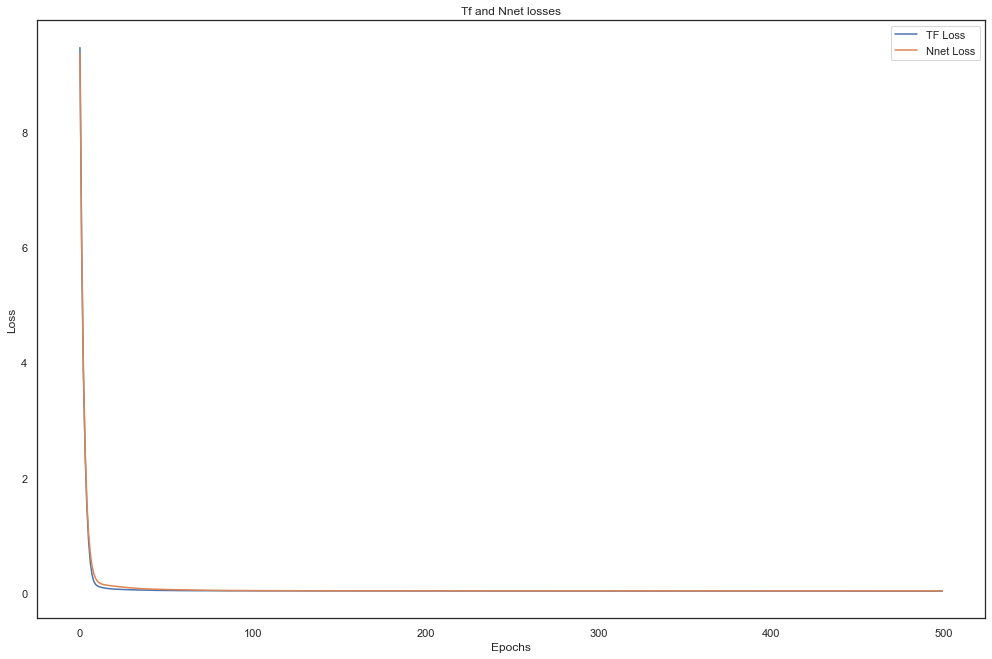

In [16]:
learning_curve_3 = sns.lineplot(x=loss_data.index, y=loss_data.loss_tf)
learning_curve_3 = sns.lineplot(x=loss_data.index, y=loss_data.loss_nnet)
learning_curve_3.set(title='Tf and Nnet losses', xlabel='Epochs', ylabel='Loss')
plt.legend(['TF Loss', 'Nnet Loss'])
None

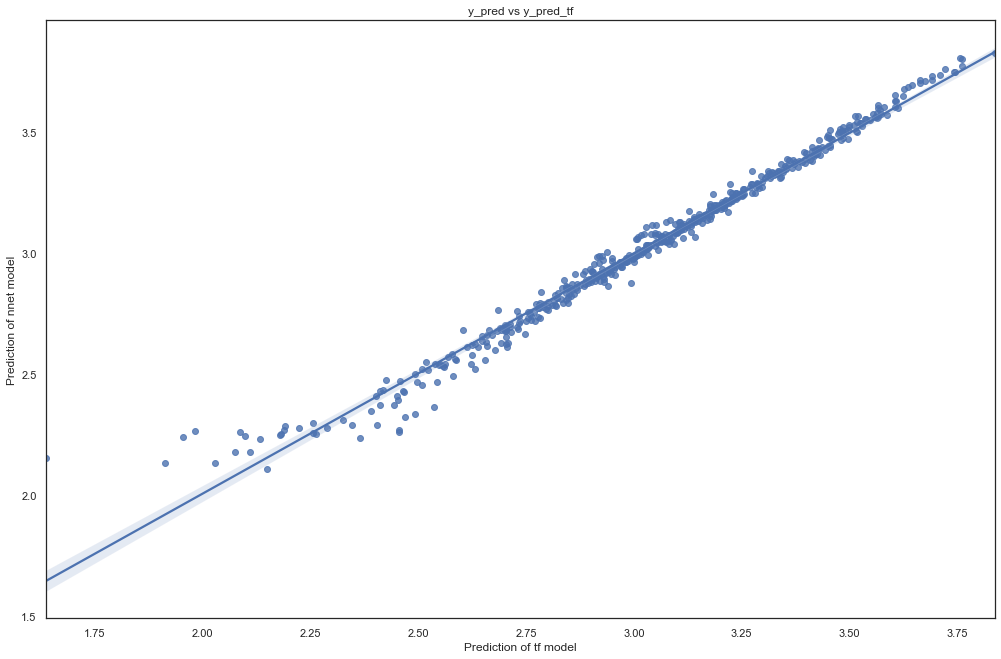

In [17]:
fig = sns.regplot(x=y_pred, y=y_pred_tf)
fig.set(xlabel='Prediction of tf model', ylabel='Prediction of nnet model', title='y_pred vs y_pred_tf')
None